In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [7]:
print(len(np.unique(y_train)))

10


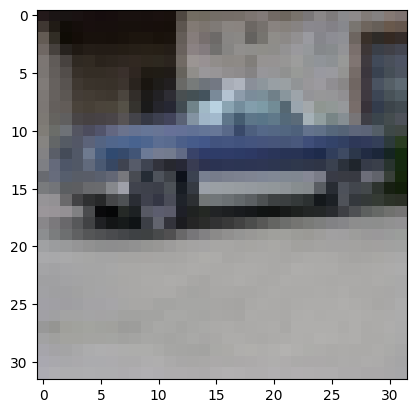

In [9]:
plt.imshow(X_train[10000])

In [10]:
CNN_model = Sequential([
    # Conv2D와 MaxPooling
    Conv2D(32,(3,3),strides=(1,1),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(32,(3,3),strides=(1,1),activation='relu'),
    # Flatten
    Flatten(),
    # Dense
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(10,activation='softmax')
])

In [ ]:
CNN_model.summary()

In [14]:
CNN_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [15]:
ep = 20
batch = 512
val_ratio = 0.2

cifar10_result = CNN_model.fit(X_train, y_train,
                               epochs=ep,
                               batch_size=batch,
                               validation_split=val_ratio)

Epoch 1/20
79/79 [==============================] - 33s 404ms/step - loss: 9.5550 - acc: 0.2223 - val_loss: 2.0430 - val_acc: 0.2802
Epoch 2/20
79/79 [==============================] - 34s 428ms/step - loss: 1.8706 - acc: 0.3345 - val_loss: 1.8389 - val_acc: 0.3439
Epoch 3/20
79/79 [==============================] - 30s 383ms/step - loss: 1.6484 - acc: 0.4160 - val_loss: 1.7104 - val_acc: 0.3947
Epoch 4/20
79/79 [==============================] - 32s 407ms/step - loss: 1.4601 - acc: 0.4829 - val_loss: 1.6603 - val_acc: 0.4195
Epoch 5/20
79/79 [==============================] - 31s 387ms/step - loss: 1.2564 - acc: 0.5571 - val_loss: 1.6661 - val_acc: 0.4286
Epoch 6/20
79/79 [==============================] - 32s 412ms/step - loss: 1.0448 - acc: 0.6342 - val_loss: 1.7810 - val_acc: 0.4354
Epoch 7/20
79/79 [==============================] - 31s 391ms/step - loss: 0.8714 - acc: 0.7011 - val_loss: 1.8524 - val_acc: 0.4328
Epoch 8/20
79/79 [==============================] - 30s 383ms/step - 

In [16]:
# test data 성능 확인
CNN_model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 4.0740 - acc: 0.4284


[4.073955535888672, 0.4284000098705292]

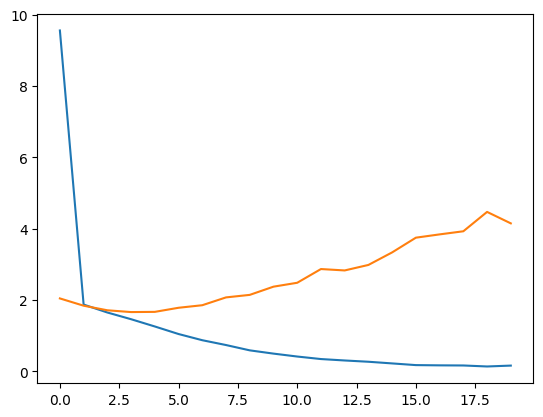

In [17]:
plt.plot(cifar10_result.history['loss'])
plt.plot(cifar10_result.history['val_loss'])

In [19]:
# X_test의 predict 후 예측 결과와 y_test 비교하기
# 서로 다르게 판단하 image의 index를 찾고
# 잘못 분류된 데이터 image와 예측 및 실제값 출력
pred_proba = CNN_model.predict(X_test)
pred = np.argmax(pred_proba,axis=1)

313/313 [==============================] - 3s 9ms/step


In [29]:
y_test.ravel()

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [24]:
# y_test는 2d array, pred는 1d array이므로
# y_test와 pred를 동일한 형태로 변경함
# y_test를 1d array로 변경
# ndarray.ravel(): 1d array로 변환
wrong_ind = np.argwhere(y_test.ravel() != pred)

In [25]:
wrong_ind

array([[   2],
       [   4],
       [   5],
       ...,
       [9997],
       [9998],
       [9999]])

[8]
5


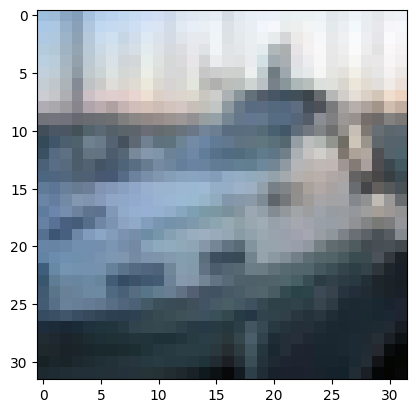

In [34]:
plt.imshow(X_test[2])
print(y_test[2])
print(pred[2])